<a href="https://colab.research.google.com/github/MauricioMCoutinho/MauricioMCoutinho/blob/main/AscQdGames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/Video_Games_Sales_at_22_Dec_2016.xlsx')

In [ ]:
df = df.dropna(subset=['Year_of_Release'])

In [ ]:
df['Year_of_Release'] = df['Year_of_Release'].astype(int)

In [ ]:
df = df.drop(columns=['Developer','Critic_Count'])

In [ ]:
df.head()

,Name,Console,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,User_Count
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,8,322.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,8,192.0
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,8.5,431.0
4,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,8.4,594.0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8577 entries, 0 to 8727
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8577 non-null   object 
 1   Console          8577 non-null   object 
 2   Year_of_Release  8577 non-null   int64  
 3   Genre            8577 non-null   object 
 4   Publisher        8576 non-null   object 
 5   NA_Sales         8577 non-null   float64
 6   EU_Sales         8577 non-null   float64
 7   JP_Sales         8577 non-null   float64
 8   Other_Sales      8577 non-null   float64
 9   Global_Sales     8577 non-null   float64
 10  Critic_Score     4818 non-null   float64
 11  User_Score       5625 non-null   object 
 12  User_Count       4587 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 938.1+ KB
None


In [ ]:
print(df.describe())

       Year_of_Release     NA_Sales     EU_Sales     JP_Sales  Other_Sales  \
count      8577.000000  8577.000000  8577.000000  8577.000000  8577.000000   
mean       2006.301154     0.323732     0.173929     0.064305     0.058648   
std           6.270536     0.949928     0.564122     0.248999     0.218505   
min        1980.000000     0.000000     0.000000     0.000000     0.000000   
25%        2003.000000     0.020000     0.000000     0.000000     0.000000   
50%        2007.000000     0.110000     0.030000     0.000000     0.010000   
75%        2011.000000     0.310000     0.150000     0.030000     0.050000   
max        2017.000000    41.360000    28.960000     6.810000    10.570000   

       Global_Sales  Critic_Score   User_Count  
count   8577.000000   4818.000000  4587.000000  
mean       0.620918     69.019925   173.859167  
std        1.731459     14.247145   562.341272  
min        0.010000     19.000000     4.000000  
25%        0.080000     60.000000    10.000000  
50%

In [ ]:
popularity_data = df.groupby(['Year_of_Release', 'Genre'])['Global_Sales'].sum().reset_index()

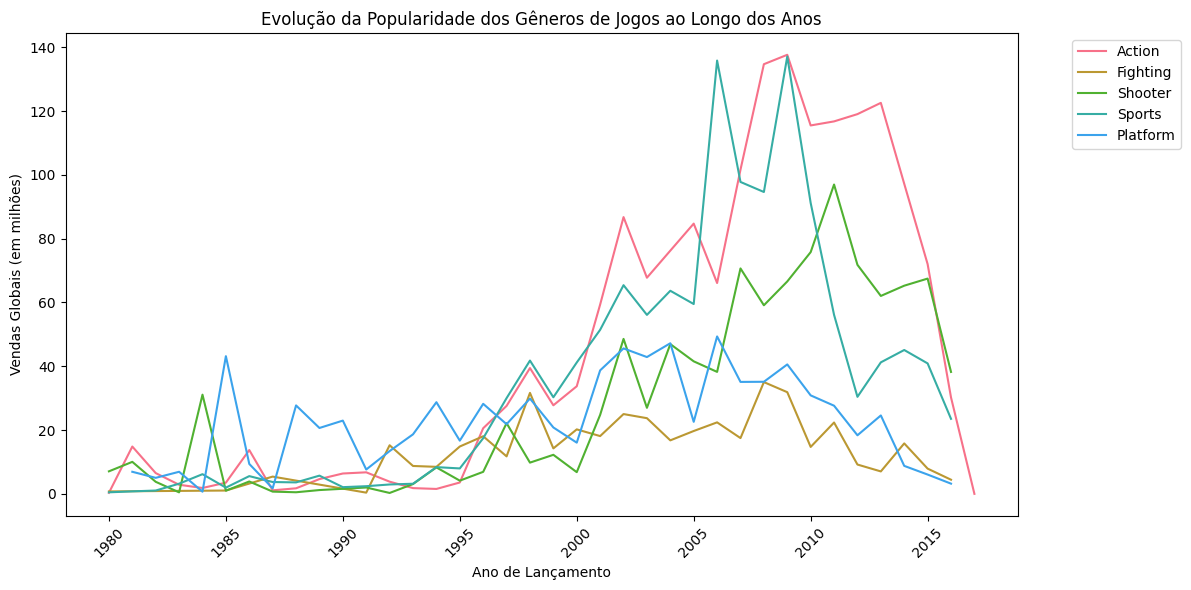

In [ ]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=popularity_data, x='Year_of_Release', y='Global_Sales', hue='Genre')
plt.title('Evolução da Popularidade dos Gêneros de Jogos ao Longo dos Anos')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Globais (em milhões)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
popularity_data1 = df.groupby(['Year_of_Release', 'Genre', 'Console'])['Global_Sales'].sum().reset_index()

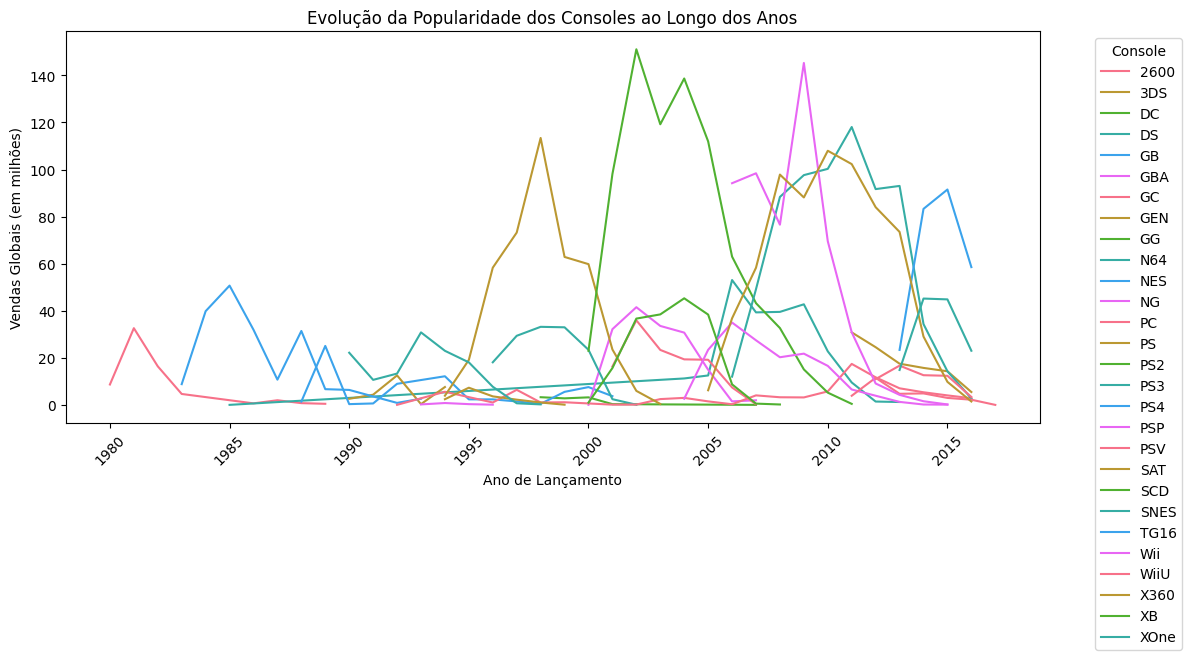

In [ ]:

console_popularity = popularity_data1.groupby(['Console', 'Year_of_Release'])['Global_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
for console in console_popularity['Console'].unique():
    console_data = console_popularity[console_popularity['Console'] == console]
    plt.plot(console_data['Year_of_Release'], console_data['Global_Sales'], label=console)

plt.title('Evolução da Popularidade dos Consoles ao Longo dos Anos')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Globais (em milhões)')
plt.xticks(rotation=45)
plt.legend(title='Console', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Total de Vendas Globais

In [ ]:
total_global_sales = popularity_data['Global_Sales'].sum()
print("Total de Vendas Globais: {:.2f} milhões".format(total_global_sales))


Total de Vendas Globais: 5325.61 milhões


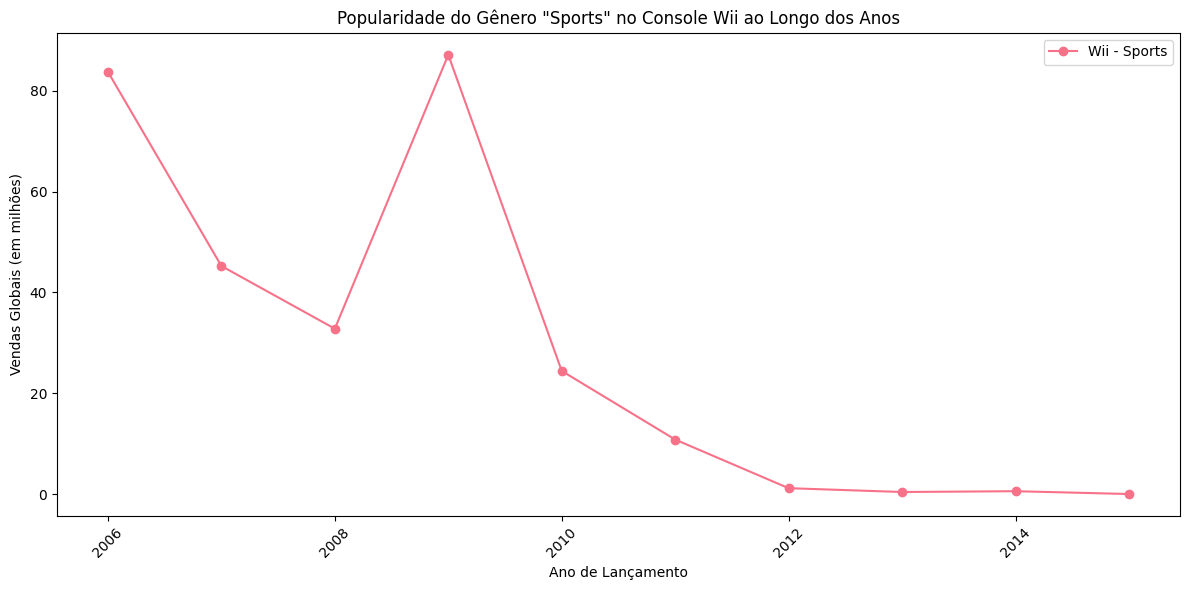

In [ ]:
wii_data = console_genre_contrib[console_genre_contrib['Console'] == 'Wii']

plt.figure(figsize=(12, 6))
plt.plot(wii_data['Year_of_Release'], wii_data['Sports'], label='Wii - Sports', marker='o')

plt.title('Popularidade do Gênero "Sports" no Console Wii ao Longo dos Anos')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Globais (em milhões)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


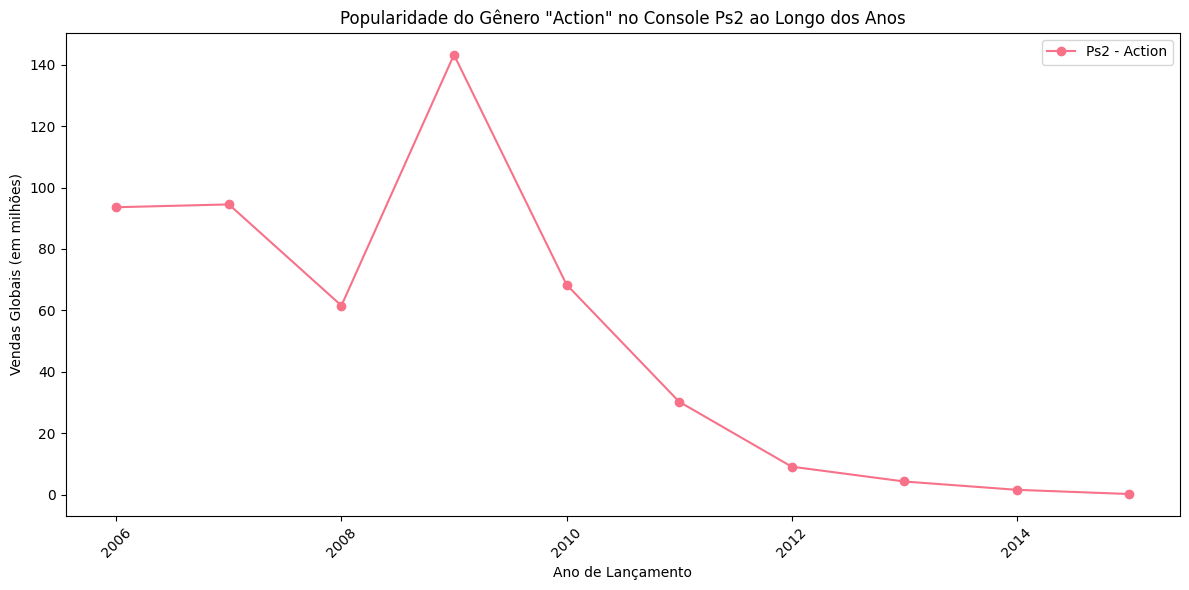

In [ ]:
psii_data = console_genre_contrib[console_genre_contrib['Console'] == 'Ps2']

plt.figure(figsize=(12, 6))
plt.plot(wii_data['Year_of_Release'], wii_data['Action'], label='Ps2 - Action', marker='o')

plt.title('Popularidade do Gênero "Action" no Console Ps2 ao Longo dos Anos')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Globais (em milhões)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
